In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data.csv", encoding = "ISO-8859-1")
df.head()

C:\Users\megamind\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


* This data is combined(across the years and states) and largely clean version of the Historical Daily Ambient Air Quality Data released by the Ministry of Environment and Forests and Central Pollution Control Board of India under the National Data Sharing and Accessibility Policy (NDSAP).
* Detect pollution trends

* **stn_code** : Station code. A code given to each station that recorded the data.
* **sampling_date** : The date when the data was recorded.
* **state** : It represents the states whose air quality data is measured.
* **location** : It represents the city whose air quality data is measured.
* **agency** : Name of the agency that measured the data.
* **type** : The type of area where the measurement was made.
* **so2** : The amount of Sulphur Dioxide measured.
* **no2** : The amount of Nitrogen Dioxide measured
* **rspm** : Respirable Suspended Particulate Matter measured.
* **spm** : Suspended Particulate Matter measured.
* **location_monitoring_station** : It indicates the location of the monitoring area.
* **pm2_5** : It represents the value of particulate matter measured.
* **date** : It represents the date of recording (It is cleaner version of ‘sampling_date’ feature)


In [3]:
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d') # date parse
df['year'] = df['date'].dt.year # year
df['year'] = df['year'].fillna(df["year"].min())
df['year'] = df['year'].values.astype(int)

In [4]:
print (df.dtypes.value_counts())

object            7
float64           5
datetime64[ns]    1
int32             1
dtype: int64


# EDA

## Null Values

In [5]:
def printNullValues(df):
    total = df.isnull().sum().sort_values(ascending = False)
    total = total[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = total / len(df) * 100
    percent = percent[df.isnull().sum().sort_values(ascending = False) != 0]
    concat = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
    print (concat)
    print ( "-------------")

In [6]:
printNullValues(df)

                              Total    Percent
pm2_5                        426428  97.862497
spm                          237387  54.478797
agency                       149481  34.304933
stn_code                     144077  33.064749
rspm                          40222   9.230692
so2                           34646   7.951035
location_monitoring_station   27491   6.309009
no2                           16233   3.725370
type                           5393   1.237659
date                              7   0.001606
sampling_date                     3   0.000688
location                          3   0.000688
-------------


* agency’s name have nothing to do with how much polluted the state is. 
* stn_code is also unnecessary.
* date and sampling_date are similar
* location_monitoring_station 

## Type

In [7]:
df["type"].value_counts()

Residential, Rural and other Areas    179014
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: type, dtype: int64

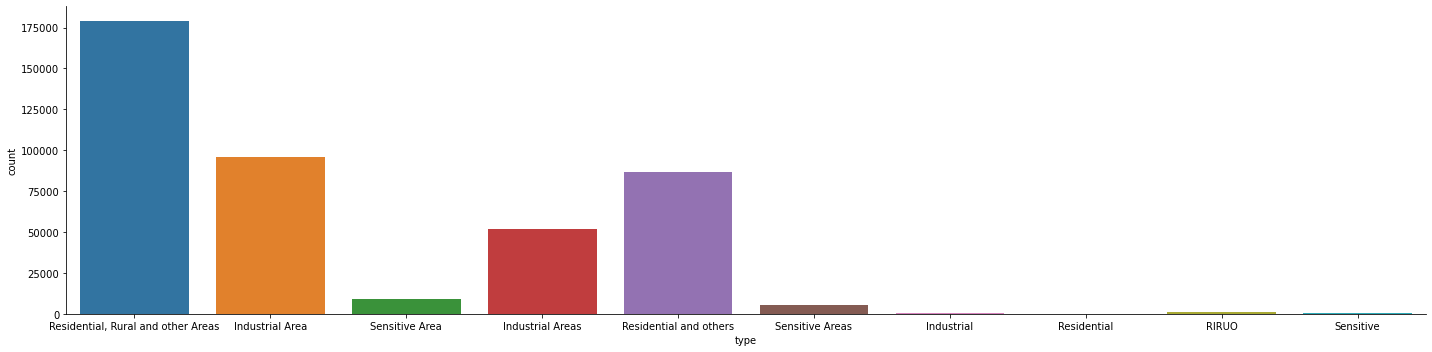

In [8]:

sns.catplot(x = "type", kind = "count",  data = df, height=5, aspect = 4)

### Analysis by type and pollution means

<AxesSubplot:xlabel='type'>

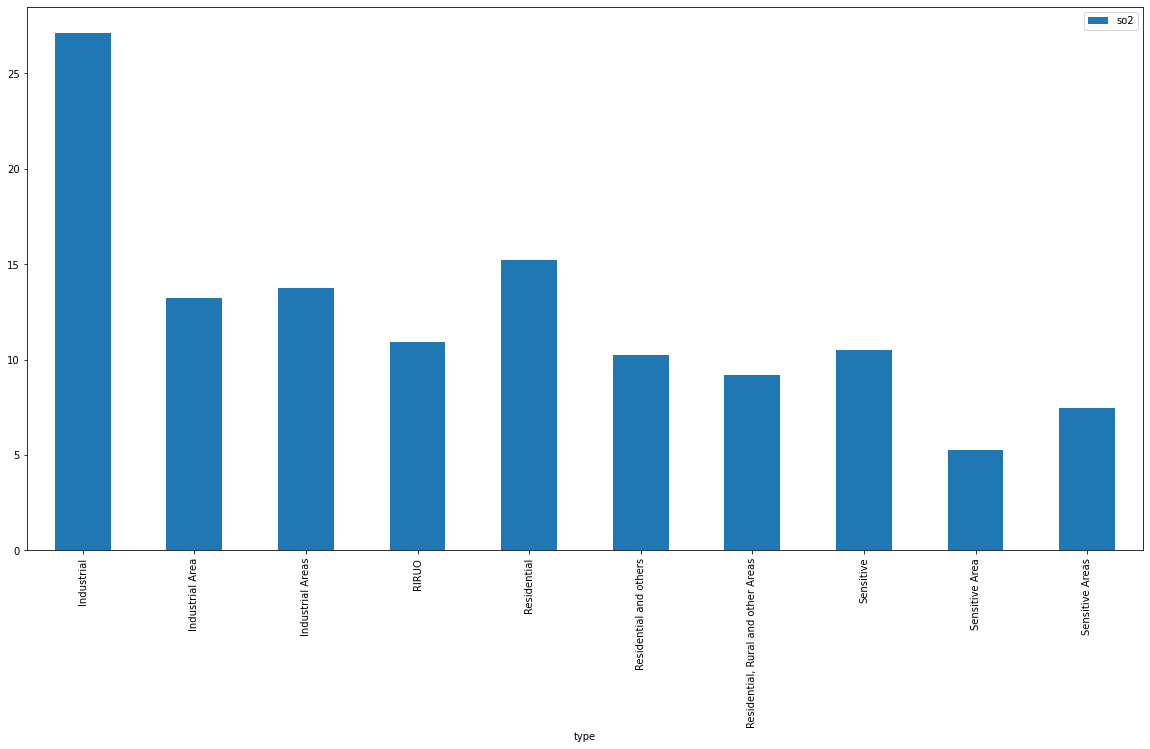

In [9]:
grp = df.groupby(["type"]).mean()["so2"].to_frame()
grp.plot.bar(figsize = (20,10))

<AxesSubplot:xlabel='type'>

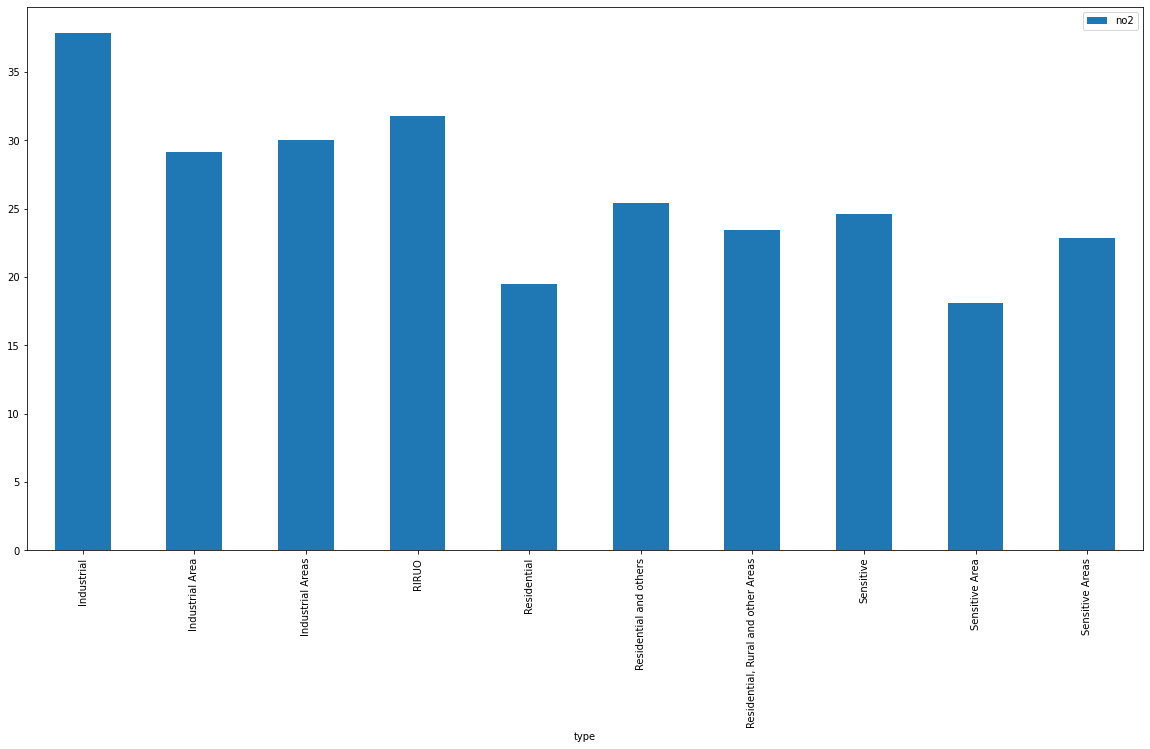

In [10]:
grp = df.groupby(["type"]).mean()["no2"].to_frame()
grp.plot.bar(figsize = (20,10))

## SO2

Sulfur dioxide

<AxesSubplot:xlabel='state'>

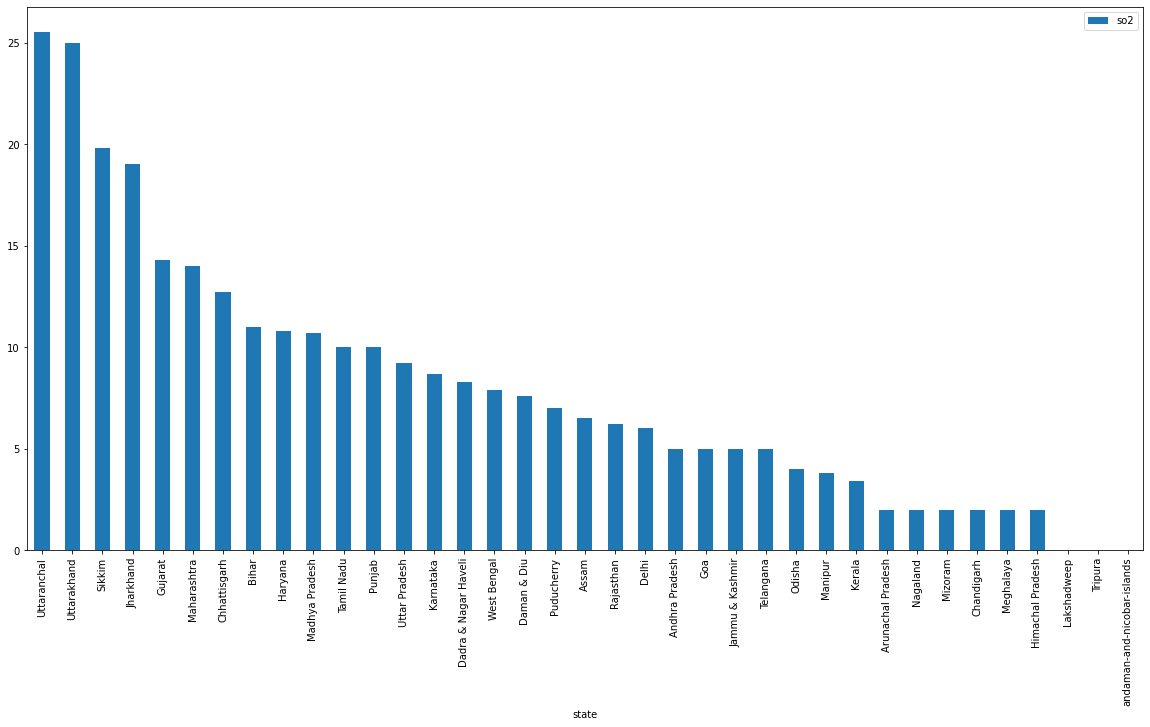

In [11]:

df[['so2', 'state']].groupby(['state']).median().sort_values("so2", ascending = False).plot.bar(figsize=(20,10))


<AxesSubplot:xlabel='year'>

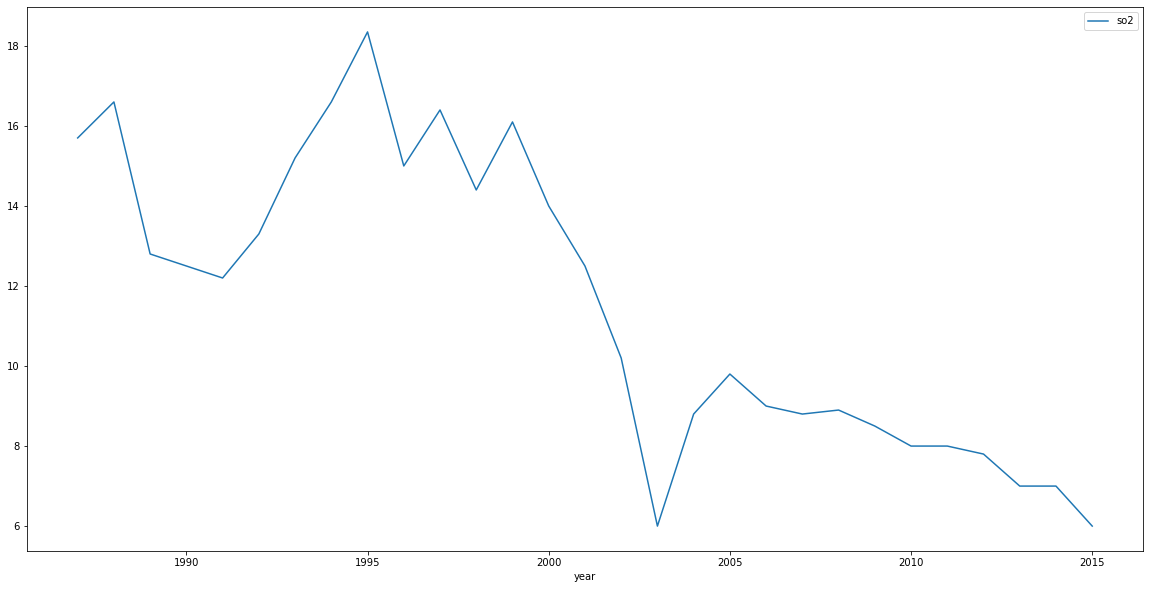

In [12]:
df[['so2','year','state']].groupby(["year"]).median().sort_values(by='year',ascending=False).plot(figsize=(20,10))

## no2 

Nitrogen dioxide

<AxesSubplot:xlabel='state'>

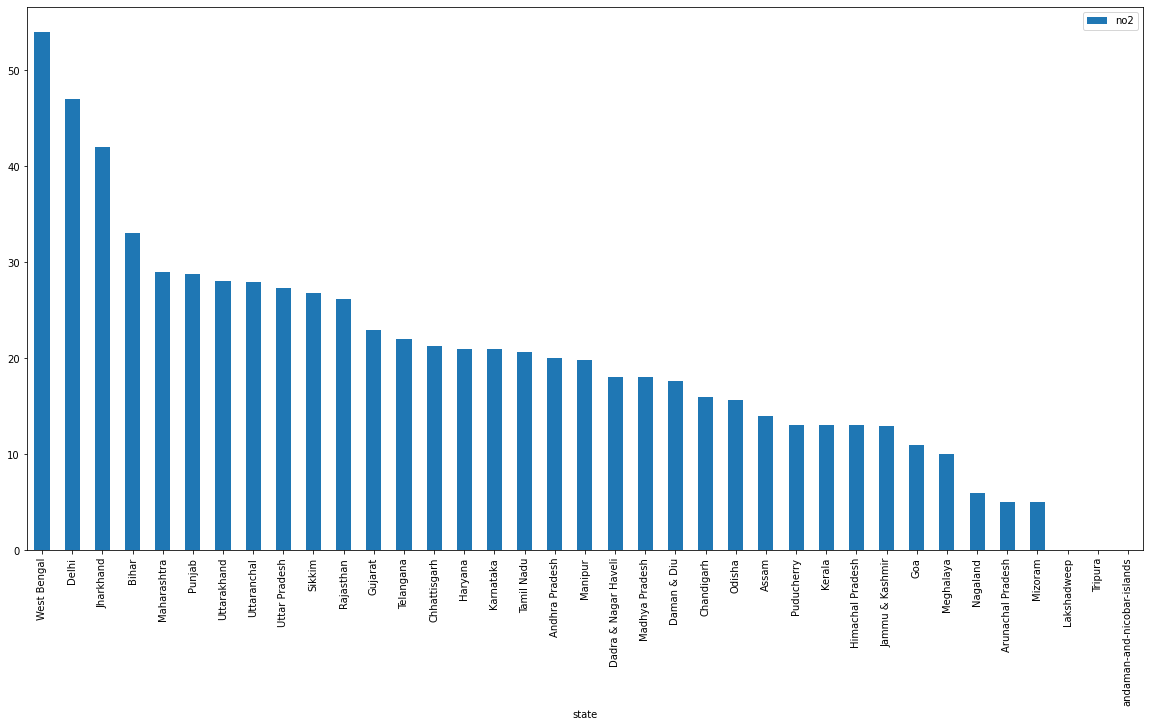

In [13]:

df[['no2', 'state']].groupby(['state']).median().sort_values("no2", ascending = False).plot.bar(figsize=(20,10))


<AxesSubplot:xlabel='year'>

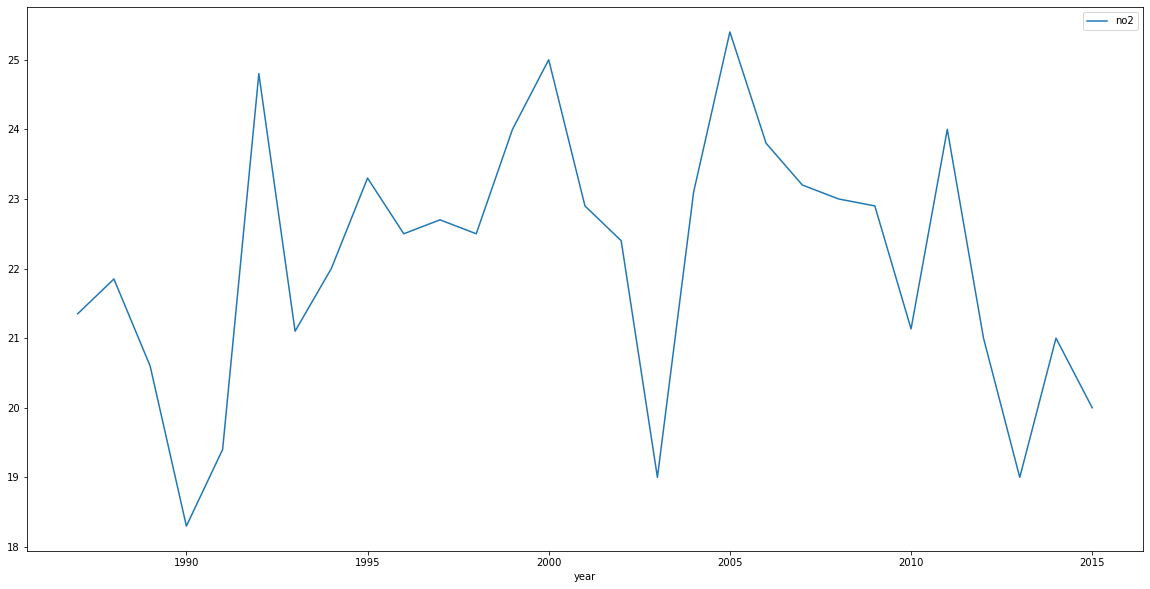

In [14]:
df[['no2','year','state']].groupby(["year"]).median().sort_values(by='year',ascending=False).plot(figsize=(20,10))

## SPM

 Suspended Particulate Matter

<AxesSubplot:xlabel='state'>

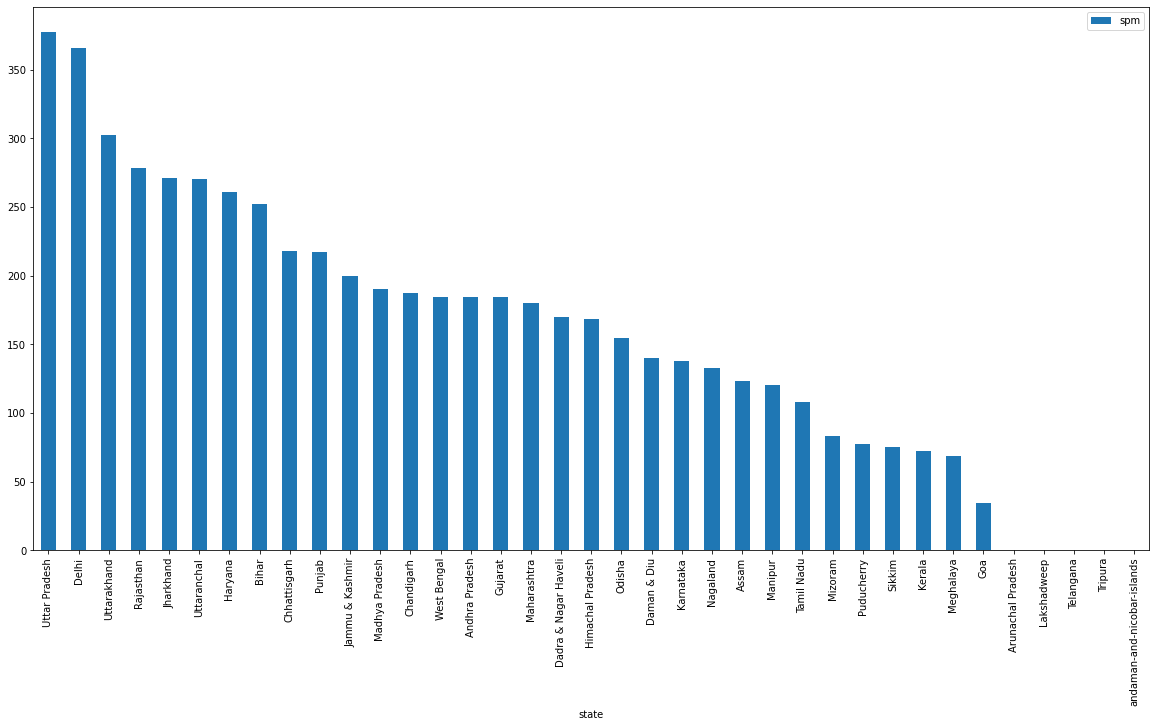

In [15]:

df[['spm', 'state']].groupby(['state']).median().sort_values("spm", ascending = False).plot.bar(figsize=(20,10))


<AxesSubplot:xlabel='year'>

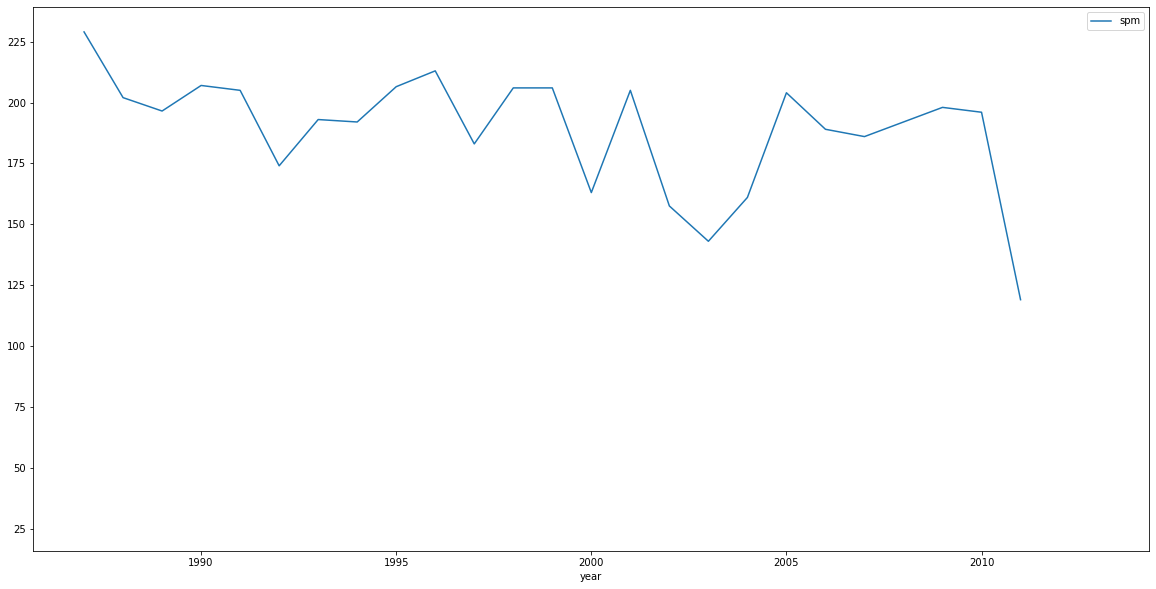

In [16]:
df[['spm','year','state']].groupby(["year"]).median().sort_values(by='year',ascending=False).plot(figsize=(20,10))

## PIVOT tables

<AxesSubplot:xlabel='year', ylabel='state'>

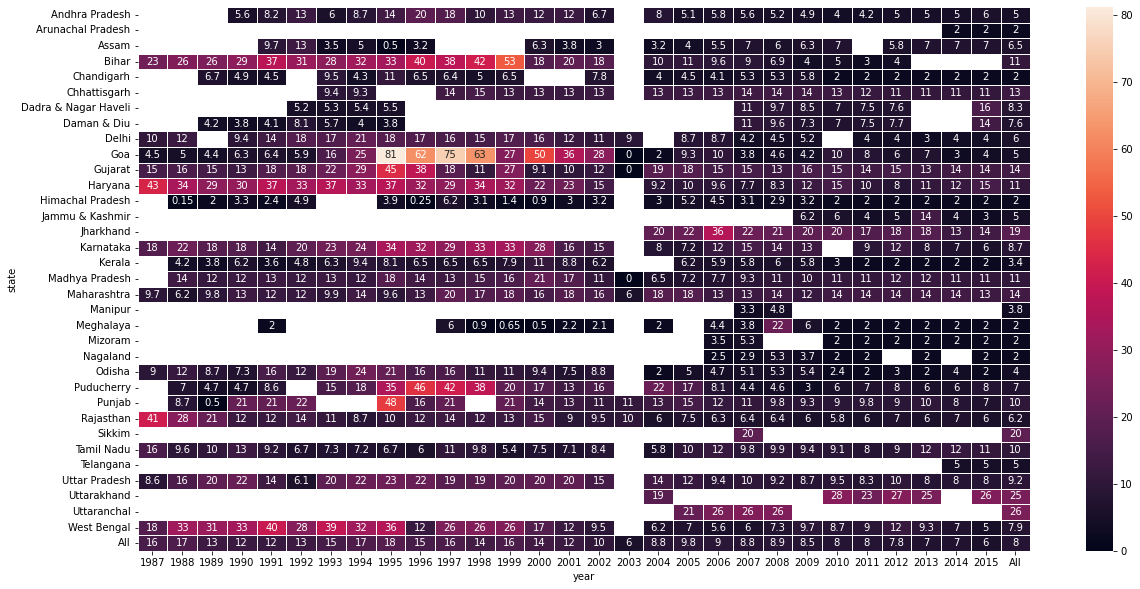

In [17]:
fig, ax = plt.subplots(figsize=(20,10))      
sns.heatmap(df.pivot_table('so2', index='state',columns=['year'],aggfunc='median',margins=True),ax = ax,annot=True, linewidths=.5)

<AxesSubplot:xlabel='year', ylabel='state'>

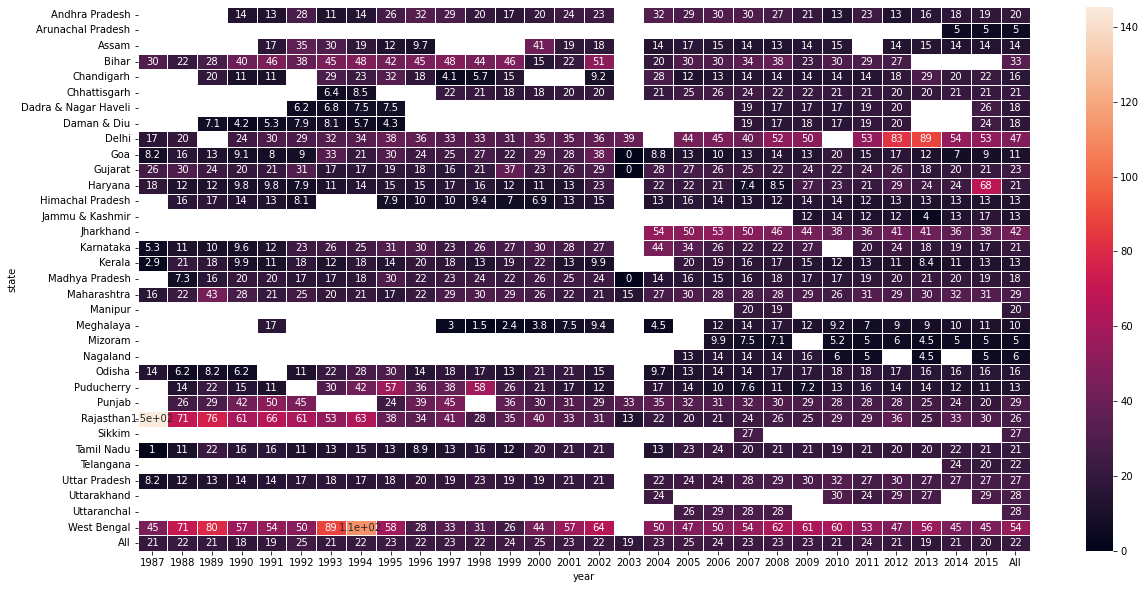

In [18]:
fig, ax = plt.subplots(figsize=(20,10))      
sns.heatmap(df.pivot_table('no2', index='state',columns=['year'],aggfunc='median',margins=True),ax = ax,annot=True, linewidths=.5)

<AxesSubplot:xlabel='year', ylabel='state'>

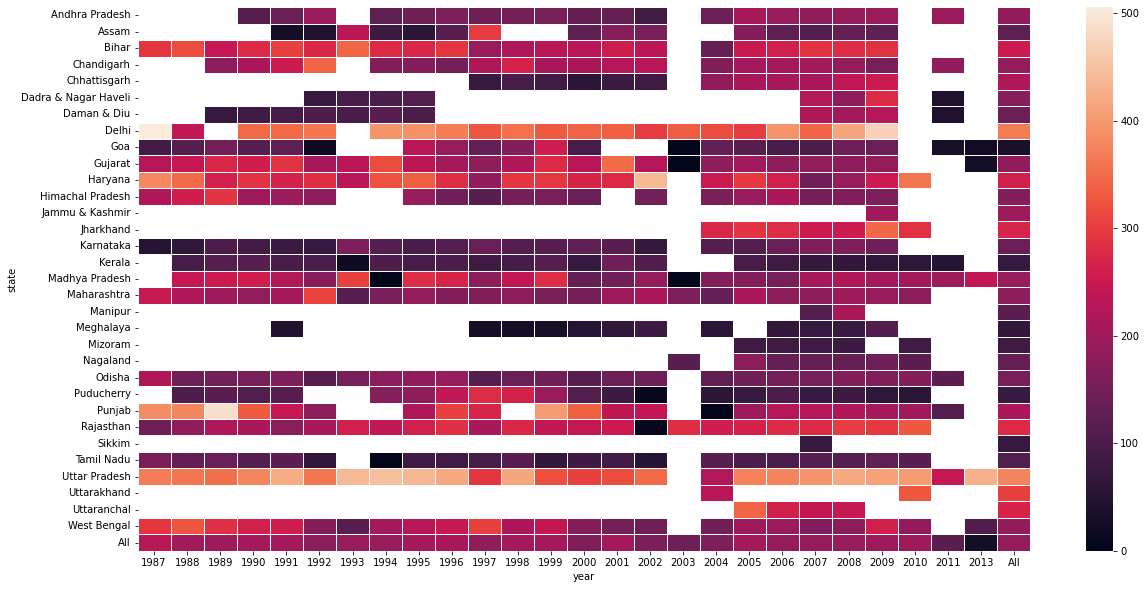

In [19]:
fig, ax = plt.subplots(figsize=(20,10))      
sns.heatmap(df.pivot_table('spm', index='state',columns=['year'],aggfunc='median',margins=True),ax = ax,annot=False, linewidths=.5)

## Trends by regions

<AxesSubplot:xlabel='year'>

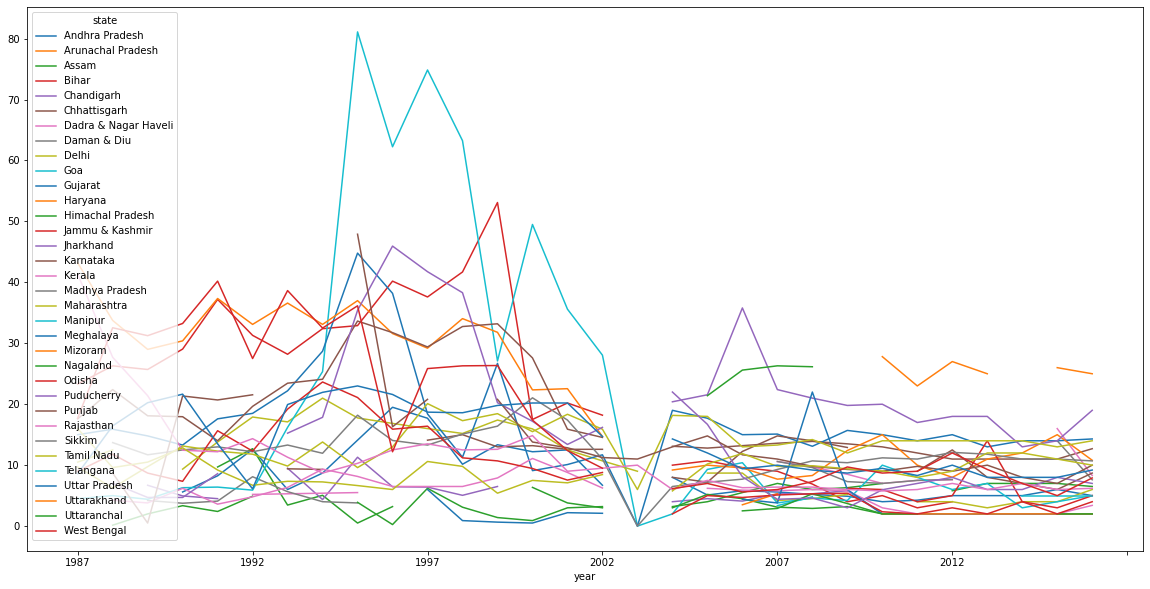

In [20]:
temp = df.pivot_table('so2', index='year',columns=['state'],aggfunc='median',margins=True).reset_index()
temp = temp.drop("All", axis = 1)
temp = temp.set_index("year")
temp.plot(figsize=(20,10))

<AxesSubplot:xlabel='year'>

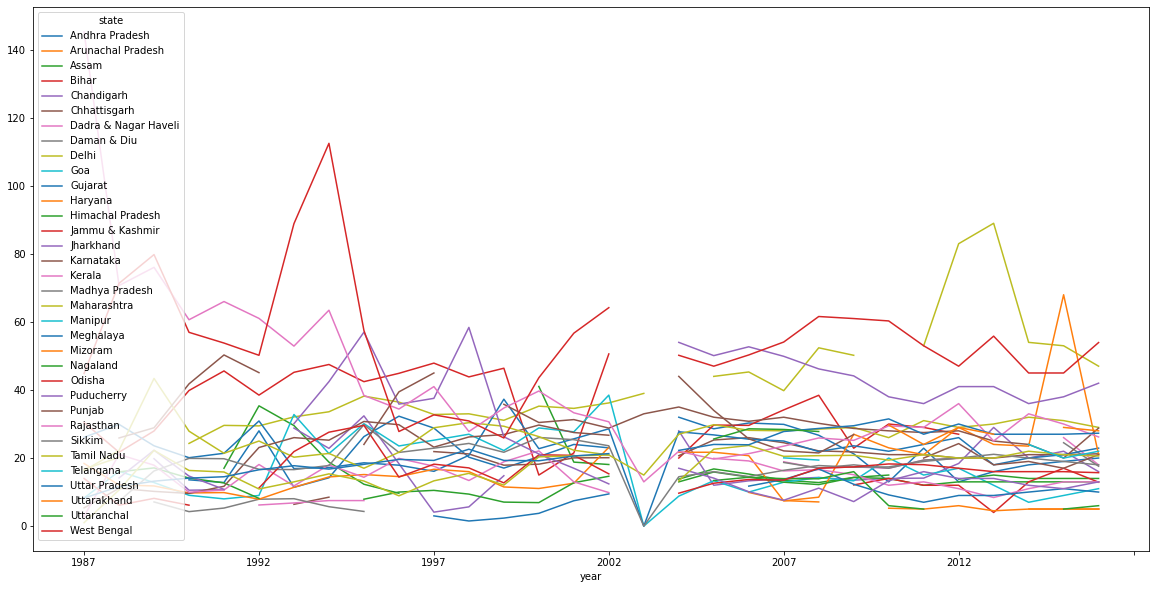

In [21]:
temp = df.pivot_table('no2', index='year',columns=['state'],aggfunc='median',margins=True).reset_index()
temp = temp.drop("All", axis = 1)
temp = temp.set_index("year")
temp.plot(figsize=(20,10))

<AxesSubplot:xlabel='year'>

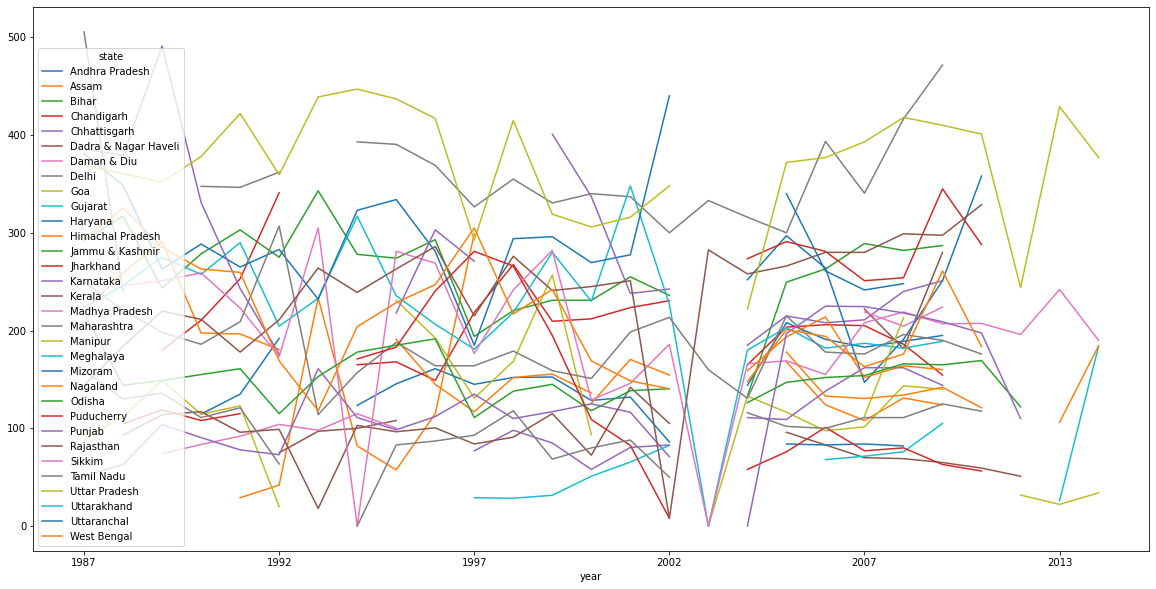

In [22]:
temp = df.pivot_table('spm', index='year',columns=['state'],aggfunc='median',margins=True).reset_index()
temp = temp.drop("All", axis = 1)
temp = temp.set_index("year")
temp.plot(figsize=(20,10))

# Time Series Analysis

* so2 Sulfur dioxide

In [23]:
df_so2 = df[["date", "so2"]]
df_so2 = df_so2.set_index("date")
df_so2 = df_so2.dropna()

In [24]:
df_so2_resample = df_so2.resample(rule = "M").mean().ffill()

<AxesSubplot:xlabel='date'>

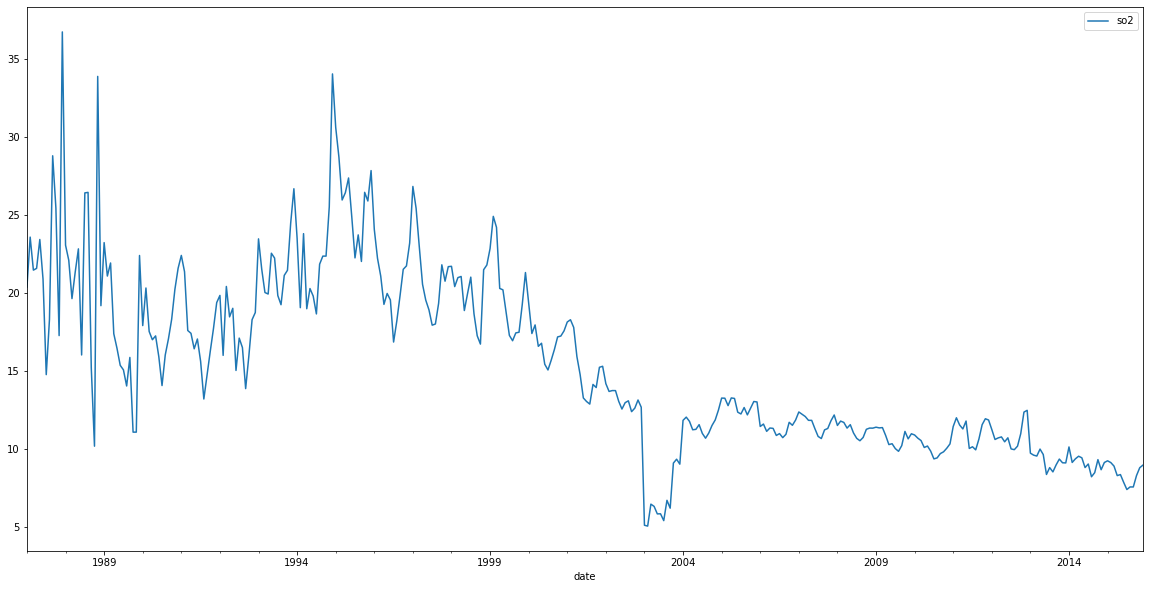

In [25]:
df_so2_resample.plot(figsize = (20,10))

<AxesSubplot:xlabel='date'>

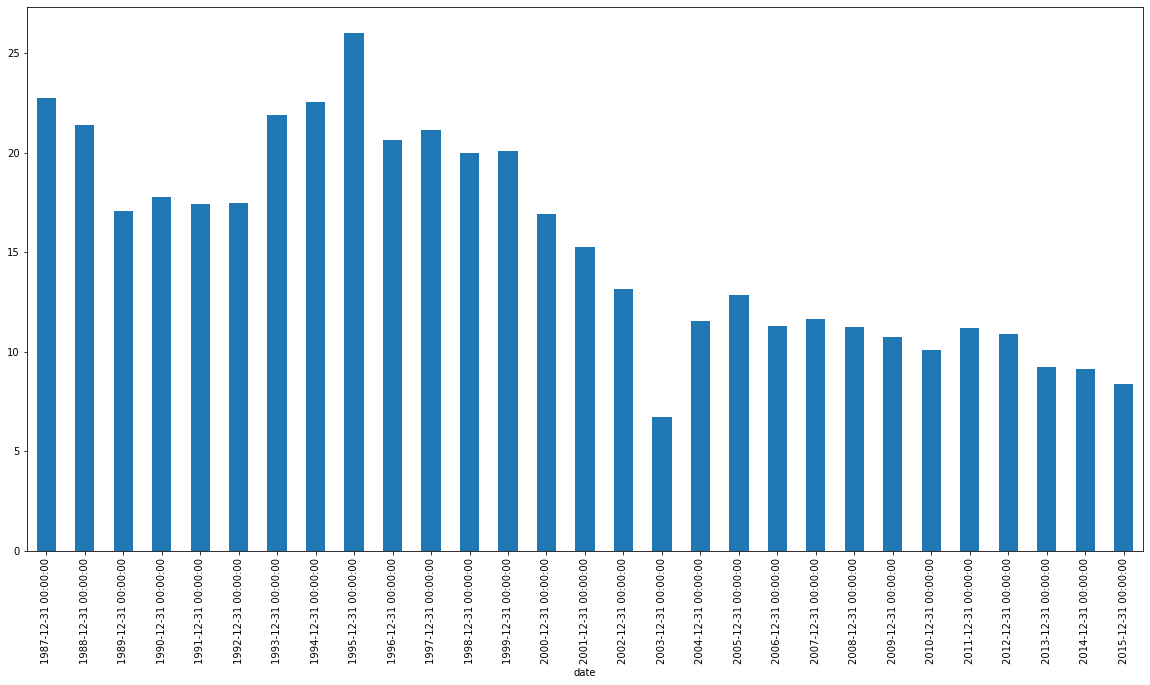

In [26]:
df_so2_resample["so2"].resample("A").mean().plot.bar(figsize = (20,10))

### ETS Decomposition (Error Trend Seasonality)

* Simple Moving Average

<AxesSubplot:xlabel='date'>

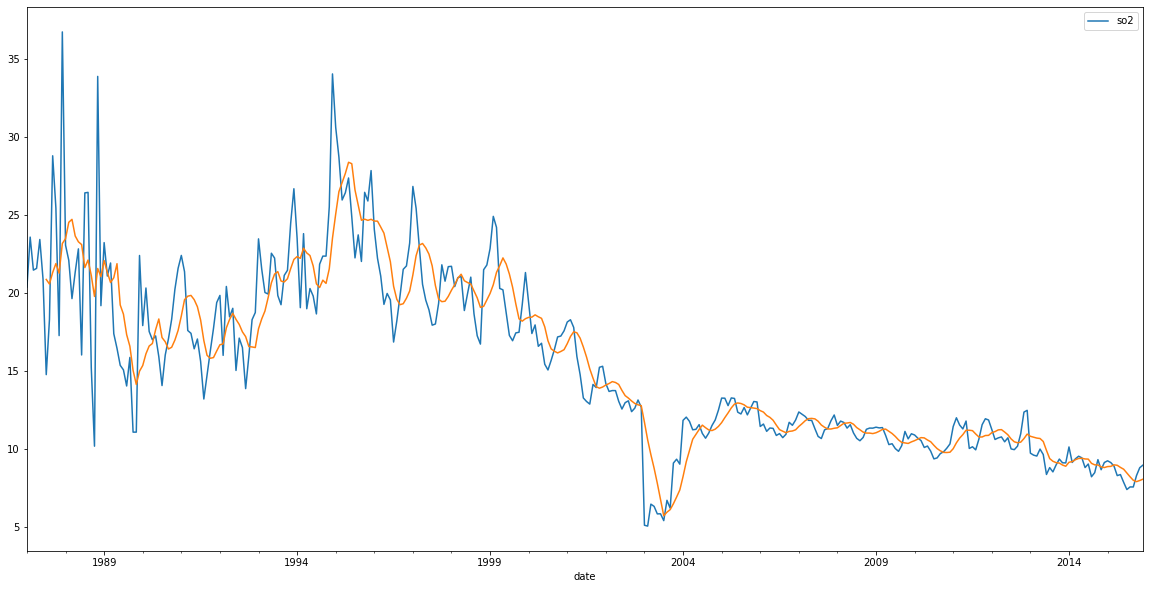

In [27]:
df_so2_resample.plot(figsize = (20,10))
df_so2_resample.rolling(window = 7).mean()["so2"].plot(figsize = (20,10))

* Exponentially weighted moving average (EWMA)
apply more weight to value more recent

In [28]:
df_so2_resample["EWMA-7"] = df_so2_resample["so2"].ewm(span=7).mean()

<AxesSubplot:xlabel='date'>

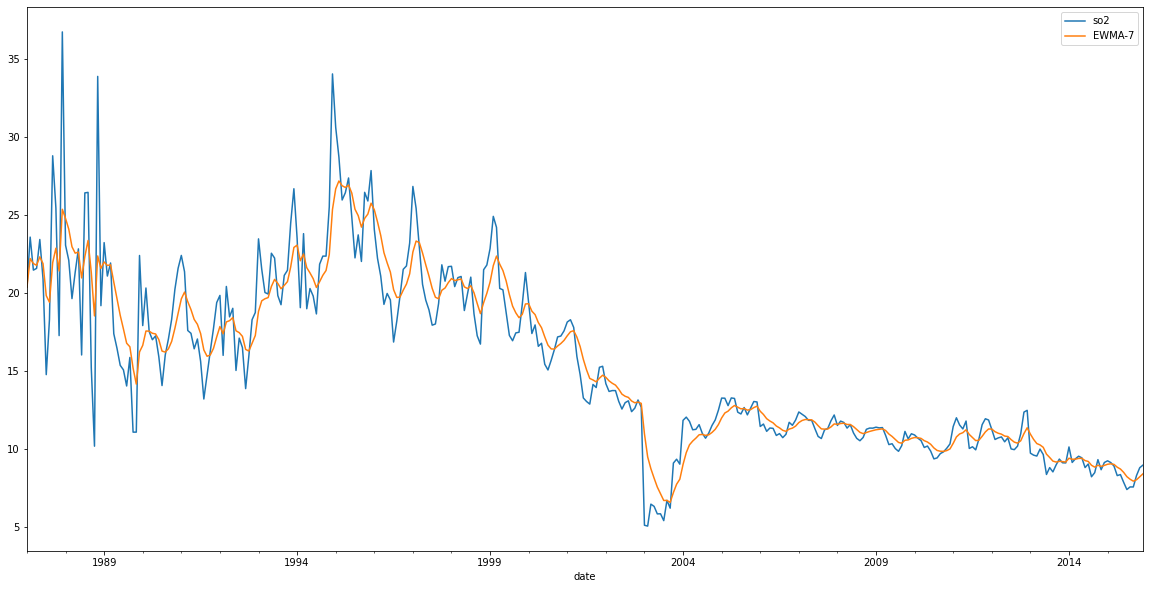

In [29]:
df_so2_resample.plot(figsize = (20,10))

### ETS



In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_so2_resample["so2"], model = "multiplicative") 

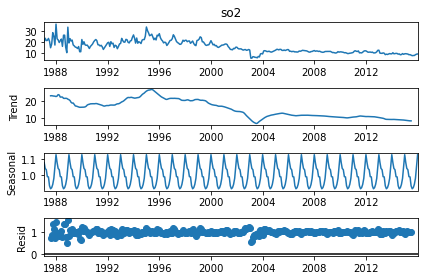

In [31]:
fig = result.plot()

## ARIMA and Seasonal ARIMA

#### Autoregressive Integrated Moving Averages

* https://people.duke.edu/~rnau/411arim3.htm ARIMA explained

* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model
* Use the model to make predictions

#### Testing the Stationarity

Basically, we are trying to whether to accept the Null Hypothesis **H0** (that the time series has a unit root, indicating it is non-stationary) or reject **H0** and go with the Alternative Hypothesis (that the time series has no unit root and is stationary).

We end up deciding this based on the p-value return.

* A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis.

* A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.



In [32]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_so2_resample["so2"])
print('Augmented Dickey-Fuller Test:')
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

for value,label in zip(result,labels):
    print(label+' : '+str(value) )
    
if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.3887732131663018
p-value : 0.5876463899272545
#Lags Used : 14
Number of Observations Used : 333
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


* the data is seasonal ---> use Seasonal ARIMA

In [33]:
df_so2_resample["so2_first_diff"] = df_so2_resample["so2"] - df_so2_resample["so2"].shift(7)
# CHECK
result = adfuller(df_so2_resample["so2_first_diff"].dropna() )
print('Augmented Dickey-Fuller Test:')
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

for value,label in zip(result,labels):
    print(label+' : '+str(value) )
    
if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

Augmented Dickey-Fuller Test:
ADF Test Statistic : -4.26462463277582
p-value : 0.0005112203813366614
#Lags Used : 17
Number of Observations Used : 323
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='date'>

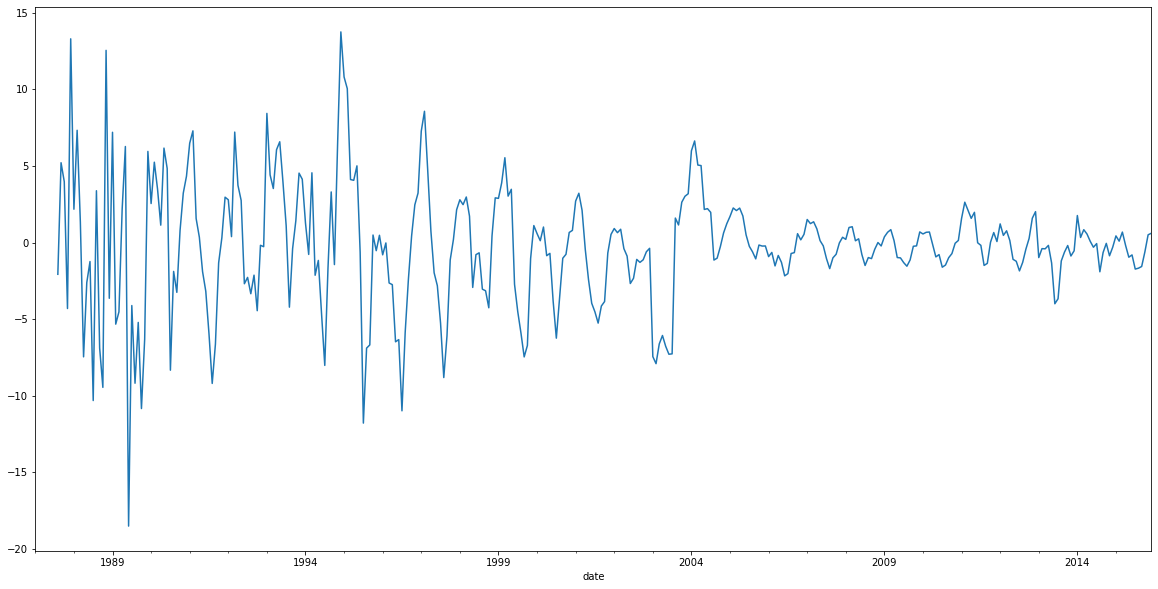

In [34]:
df_so2_resample["so2_first_diff"].plot(figsize = (20,10))

<AxesSubplot:xlabel='date'>

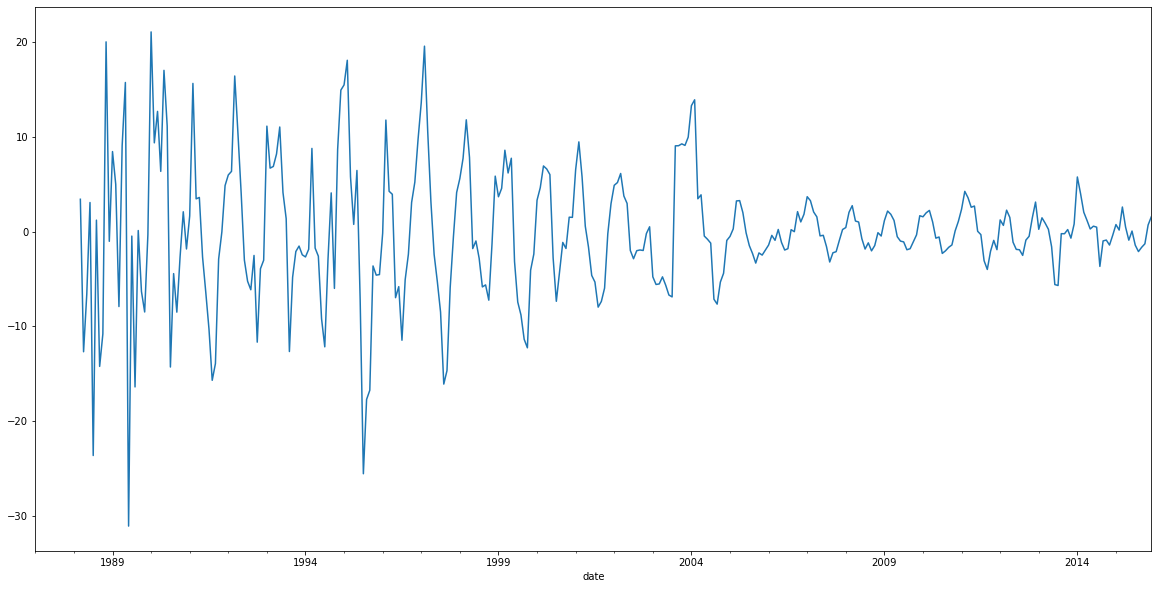

In [35]:
df_so2_resample["so2_second_diff"] = df_so2_resample["so2_first_diff"] - df_so2_resample["so2_first_diff"].shift(7)
df_so2_resample["so2_second_diff"].plot(figsize = (20,10))

## Using the Seasonal ARIMA model

C:\Users\megamind\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\megamind\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                      SARIMAX Results                                       
Dep. Variable:                                  so2   No. Observations:                  348
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 48)   Log Likelihood                -760.884
Date:                              Sat, 05 Mar 2022   AIC                           1527.768
Time:                                      16:39:47   BIC                           1538.869
Sample:                                  01-31-1987   HQIC                          1532.211
                                       - 12-31-2015                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L48      -0.1186      0.249     -0.476      0.634      -0.607       0.370
ma.S.L48      -0.25

<AxesSubplot:xlabel='date'>

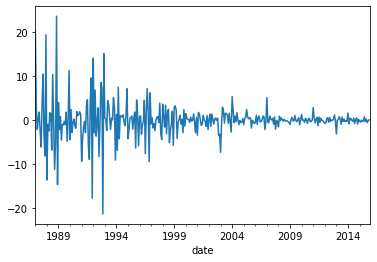

In [36]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(df_so2_resample["so2"],order=(0,1,0), seasonal_order=(1,1,1,48))
results = model.fit()
print(results.summary())
results.resid.plot()

<AxesSubplot:ylabel='Density'>

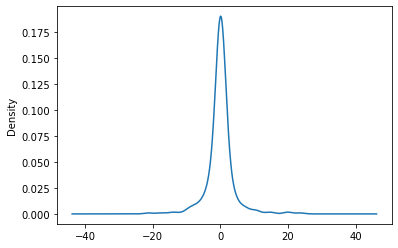

In [37]:
results.resid.plot(kind='kde')

#### Check with known data 

<AxesSubplot:xlabel='date'>

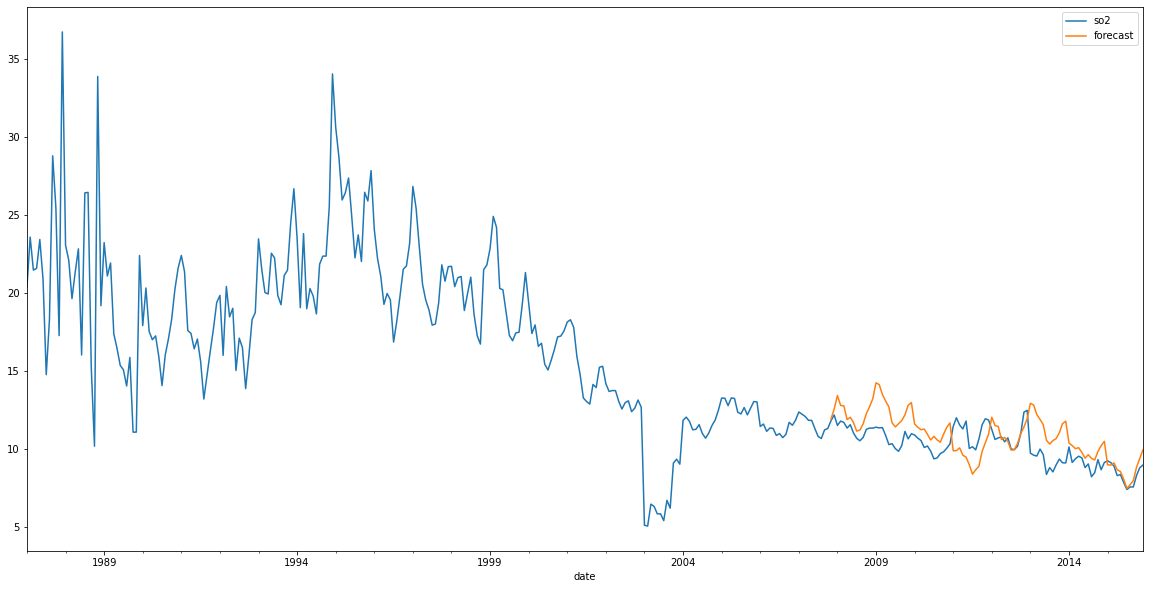

In [38]:
df_so2_resample['forecast'] = results.predict(start = 250, end= 400, dynamic= True)  
df_so2_resample[['so2','forecast']].plot(figsize=(20,10))

# Forecast

* so2

<AxesSubplot:>

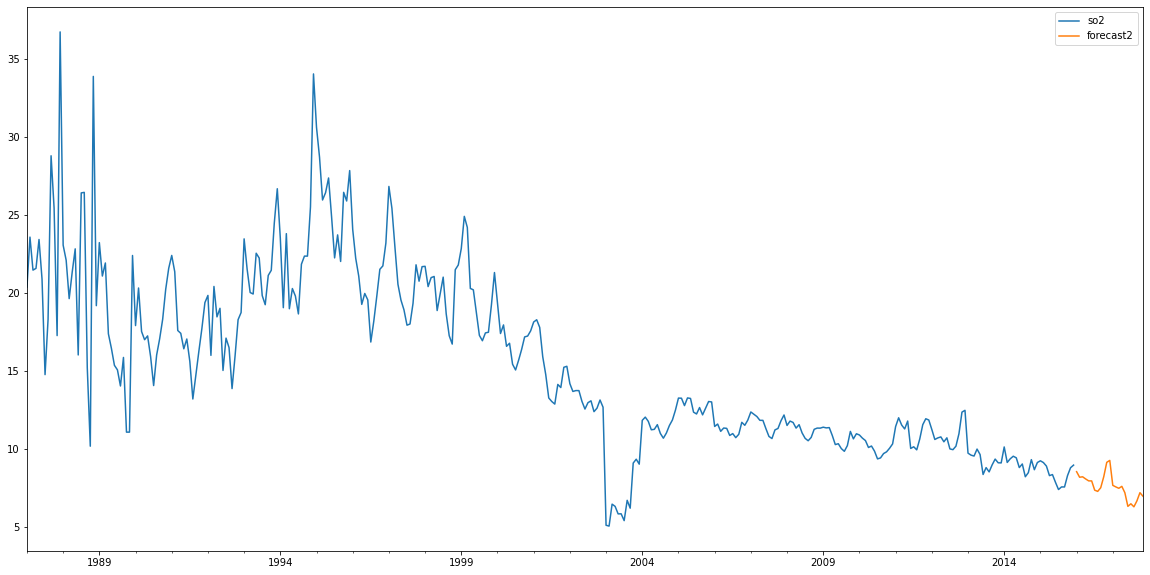

In [39]:
from pandas.tseries.offsets import DateOffset
future_dates = [df_so2_resample.index[-1] + DateOffset(months=x) for x in range(0,24) ]
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=df_so2_resample.columns)
future_df = pd.concat([df_so2_resample,future_dates_df])
future_df['forecast2'] = results.predict(start = 348, end = 540, dynamic= True)  
future_df[['so2', 'forecast2']].plot(figsize=(20, 10)) 